# 6.4.2 Machine Learning

## This script contains the following:
### 01. Importing Libraries
### 02. Data Prep
### 03. Regression Analysis

### 01. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Creating path variable
path = r'C:\Users\widne\Documents\CareerFoundry Exercises\Data_Immersion\Achievement 6\06-2024 International Football Matches'

In [4]:
# Importing team results dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'team_results.pkl'))
df.head()

,team,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,...,friendly_goals_against,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference
0,Abkhazia,11.0,3.0,14.0,3.0,2.0,5.0,8.0,5.0,13.0,...,6.0,1.000000,-2.0,-0.333333,47.0,1.807692,20.0,0.769231,27.0,1.038462
1,Afghanistan,18.0,17.0,35.0,17.0,52.0,69.0,10.0,21.0,31.0,...,49.0,1.484848,-20.0,-0.606061,109.0,1.068627,228.0,2.235294,-119.0,-1.166667
2,Albania,73.0,27.0,100.0,78.0,115.0,193.0,46.0,34.0,80.0,...,140.0,1.228070,-5.0,-0.043860,216.0,0.833977,425.0,1.640927,-209.0,-0.806950
3,Alderney,1.0,4.0,5.0,46.0,82.0,128.0,1.0,1.0,2.0,...,12.0,4.000000,-9.0,-3.000000,70.0,0.530303,608.0,4.606061,-538.0,-4.075758
4,Algeria,191.0,73.0,264.0,60.0,103.0,163.0,82.0,75.0,157.0,...,239.0,1.057522,58.0,0.256637,581.0,1.622905,354.0,0.988827,227.0,0.634078


In [5]:
df.columns

Index(['team', 'home_wins', 'away_wins', 'total_wins', 'home_losses',
       'away_losses', 'total_losses', 'home_draws', 'away_draws',
       'total_draws', 'home_games_played', 'away_games_played',
       'total_games_played', 'home_win_pct', 'home_unbeaten_pct',
       'away_win_pct', 'away_unbeaten_pct', 'win_pct', 'unbeaten_pct',
       'home_friendly_wins', 'away_friendly_wins', 'total_friendly_wins',
       'home_friendly_losses', 'away_friendly_losses', 'total_friendly_losses',
       'home_friendly_draws', 'away_friendly_draws', 'total_friendly_draws',
       'home_friendly_games_played', 'away_friendly_games_played',
       'total_friendly_games_played', 'home_friendly_win_pct',
       'home_friendly_unbeaten_pct', 'away_friendly_win_pct',
       'away_friendly_unbeaten_pct', 'friendly_win_pct',
       'friendly_unbeaten_pct', 'tournament_wins', 'tournament_losses',
       'tournament_draws', 'tournament_games_played', 'tournament_win_pct',
       'tournament_unbeaten_pct', '

### 02. Data Prep

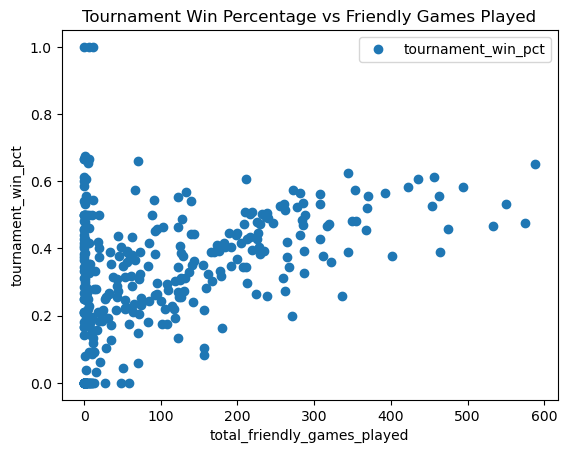

In [5]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'total_friendly_games_played', y='tournament_win_pct',style='o')
plt.title('Tournament Win Percentage vs Friendly Games Played')  
plt.xlabel('total_friendly_games_played')  
plt.ylabel('tournament_win_pct')  
plt.show()

In [6]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X = df['total_friendly_games_played'].values.reshape(-1,1)
y = df['tournament_win_pct'].values.reshape(-1,1)

In [7]:
X

array([[  6.],
       [ 33.],
       [114.],
       [  3.],
       [226.],
       [  1.],
       [ 13.],
       [ 51.],
       [143.],
       [ 15.],
       [ 61.],
       [  0.],
       [370.],
       [ 74.],
       [  2.],
       [ 54.],
       [273.],
       [474.],
       [123.],
       [  7.],
       [192.],
       [ 54.],
       [  4.],
       [137.],
       [ 58.],
       [124.],
       [454.],
       [ 23.],
       [130.],
       [ 73.],
       [ 13.],
       [  0.],
       [156.],
       [  1.],
       [ 85.],
       [142.],
       [436.],
       [ 29.],
       [ 10.],
       [ 12.],
       [344.],
       [200.],
       [  0.],
       [ 43.],
       [ 54.],
       [210.],
       [198.],
       [  4.],
       [ 45.],
       [  1.],
       [ 48.],
       [ 18.],
       [ 25.],
       [  2.],
       [ 23.],
       [  9.],
       [  0.],
       [322.],
       [286.],
       [230.],
       [ 20.],
       [141.],
       [  5.],
       [  7.],
       [232.],
       [  0.],
       [14

In [8]:
y

array([[0.46153846],
       [0.26470588],
       [0.22779923],
       [0.03787879],
       [0.47765363],
       [0.07843137],
       [0.        ],
       [0.04516129],
       [0.3625498 ],
       [0.03225806],
       [0.3164557 ],
       [0.5       ],
       [0.55455904],
       [0.23163842],
       [0.55555556],
       [0.2195122 ],
       [0.57342657],
       [0.45682451],
       [0.13333333],
       [0.22916667],
       [0.34699454],
       [0.24680851],
       [0.25      ],
       [0.32885906],
       [0.        ],
       [0.25443787],
       [0.52588556],
       [0.18292683],
       [0.27325581],
       [0.39047619],
       [0.09090909],
       [0.66666667],
       [0.21551724],
       [0.38709677],
       [0.41477273],
       [0.23976608],
       [0.60535117],
       [0.1025641 ],
       [0.5       ],
       [0.13392857],
       [0.3902439 ],
       [0.36864407],
       [0.28571429],
       [0.31012658],
       [0.22222222],
       [0.50913838],
       [0.43881857],
       [0.   

In [9]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 03. Regression Analysis

In [10]:
# Creating a regression object.
regression = LinearRegression() 

In [11]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predicting the values of y using X.
y_predicted = regression.predict(X_test)

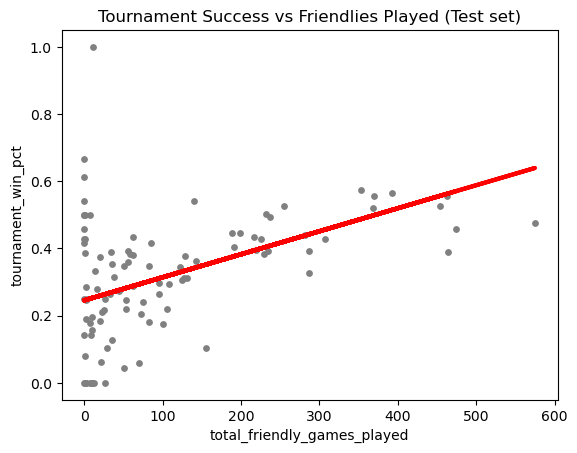

In [13]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Tournament Success vs Friendlies Played (Test set)')
plot_test.xlabel('total_friendly_games_played')
plot_test.ylabel('tournament_win_pct')
plot_test.show()

The test set shows a weak correllation between the number of friendly matches played and the win percentage of teams in tournaments. There is some trend where teams that play more friendly matches have higher tournament win percentages, but there are many outliers with teams that play few friendly matches.

In [14]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [15]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00068527]]
Mean squared error:  0.026609616385145706
R2 score:  0.17872291059740208


In [16]:
y_predicted

array([[0.26862503],
       [0.24738165],
       [0.25012273],
       [0.30220329],
       [0.29466532],
       [0.43857214],
       [0.28233045],
       [0.32892885],
       [0.40430861],
       [0.49819068],
       [0.3323552 ],
       [0.24532583],
       [0.33509628],
       [0.40293807],
       [0.2460111 ],
       [0.40773497],
       [0.55643868],
       [0.31453816],
       [0.25012273],
       [0.26519868],
       [0.24532583],
       [0.56329139],
       [0.29329478],
       [0.25149327],
       [0.25491962],
       [0.33098466],
       [0.26108706],
       [0.24669638],
       [0.37621252],
       [0.25629016],
       [0.24532583],
       [0.25149327],
       [0.28027463],
       [0.31042654],
       [0.28507153],
       [0.29672113],
       [0.44199849],
       [0.250808  ],
       [0.30220329],
       [0.56260612],
       [0.24532583],
       [0.2624576 ],
       [0.25903125],
       [0.24532583],
       [0.24532583],
       [0.26382814],
       [0.42006984],
       [0.394

In [17]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.388350,0.268625
1,0.245902,0.247382
2,0.000000,0.250123
3,0.347032,0.302203
4,0.206061,0.294665
5,0.439791,0.438572
6,0.219512,0.282330
7,0.344720,0.328929
8,0.502174,0.404309
9,0.519582,0.498191


In [18]:
# Comparing how the regression fits the training set
y_predicted_train = regression.predict(X_train)

In [19]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [20]:
# Printing summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00068527]]
Mean squared error:  0.031002883351467662
R2 score:  0.1929381183241171


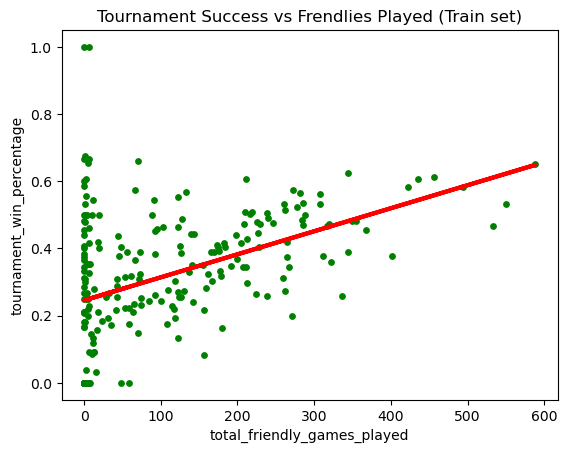

In [21]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Tournament Success vs Frendlies Played (Train set)')
plot_test.xlabel('total_friendly_games_played')
plot_test.ylabel('tournament_win_percentage')
plot_test.show()

The training set had a slightly higher R2 score but overall it still shows a weak correllation. One reason it is like this because there could be teams that have a low sample size of matches played which might be causing the outliers when there is a low number of friendly matches played.